In [1]:
import matplotlib.pyplot as plt
import numpy as np
import autograd.numpy as au
from autograd import grad, jacobian
import scipy
from scipy.optimize import line_search



### Davidon-Fletcher-Powell Algorithm

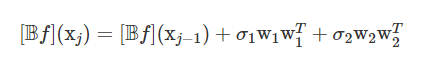

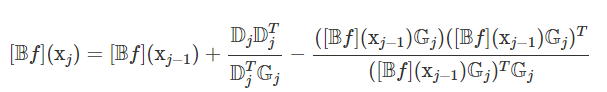

In [2]:
func = lambda x: (x[0]+2*x[1]-7)**2 + (2*x[0]+x[1]-5)**2
Df= grad(func)


<a list of 102 text.Text objects>

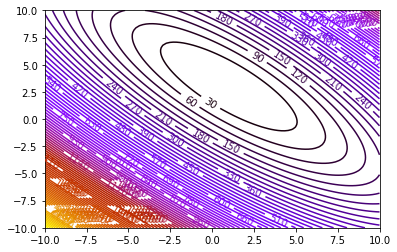

In [3]:
# draw the contour plot first
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])

contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)


In [9]:
NORM=np.linalg.norm #why??
def DFP(Xj, tol):
    x1 = [Xj[0]]
    x2 = [Xj[1]]
    Bf = np.eye(len(Xj))
    
    while True:
        Grad = Df(Xj)
        delta = -Bf.dot(Grad) # Selection of the direction of the steepest descent
        
        
        start_point = Xj # Start point for step length selection 
        beta = line_search(f=func, myfprime=Df, xk=start_point, pk=delta)[0] # Selecting the step length
        if beta!=None:
            X = Xj+ beta*delta
        if NORM(Df(X)) < tol:
            x1 += [X[0], ]
            x2 += [X[1], ]
            plt.plot(x1, x2, "rx-", ms=5.5) # Plot the final collected data showing the trajectory of optimization
            plt.show()
            return X, func(X),(x1,x2)
        else:
            Dj = X - Xj # See line 16 of the algorithm
            Gj = Df(X) - Grad # See line 17 of the algorithm
            w1 = Dj # See line 18 of the algorithm
            w2 = Bf.dot(Gj) # See line 19 of the algorithm
            w1T = w1.T
            w2T = w2.T
            sigma1 = 1/(w1T.dot(Gj)) # See line 20 of the algorithm
            sigma2 = -1/(w2T.dot(Gj)) # See line 21 of the algorithm
            W1 = np.outer(w1, w1)
            W2 = np.outer(w2, w2)
            Delta = sigma1*W1 + sigma2*W2 # See line 22 of the algorithm
            Bf += Delta # See line 23 of the algorithm
            Xj = X # Update to the new iterate
            x1 += [Xj[0], ]
            x2 += [Xj[1], ]

In [15]:
# draw the contour plot first
func= lambda x:  0.26*(x[0]**2+x[1]**2) -0.48*x[0]*x[1]

x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
z = np.zeros(([len(x1), len(x2)]))
for i in range(0, len(x1)):
    for j in range(0, len(x2)):
        z[j, i] = func([x1[i], x2[j]])

contours=plt.contour(x1, x2, z, 100, cmap=plt.cm.gnuplot)
plt.clabel(contours, inline=1, fontsize=10)
DFP(np.array([-4.5, -4.5]), 10**-5)

C:\Users\PEDROT~1\AppData\Local\Temp/ipykernel_14096/1788395941.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  sigma1 = 1/(w1T.dot(Gj)) # See line 20 of the algorithm
C:\Users\PEDROT~1\AppData\Local\Temp/ipykernel_14096/1788395941.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  sigma2 = -1/(w2T.dot(Gj)) # See line 21 of the algorithm
C:\Users\PEDROT~1\AppData\Local\Temp/ipykernel_14096/1788395941.py:33: RuntimeWarning: invalid value encountered in multiply
  Delta = sigma1*W1 + sigma2*W2 # See line 22 of the algorithm


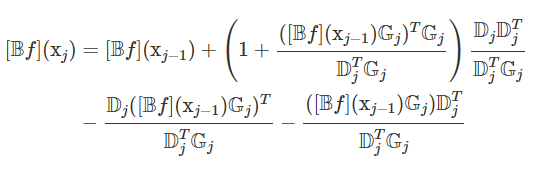

In [2]:
booth = lambda x: np.square(x[0]+2*x[1]-7) + np.square(2*x[0]+x[1]-5)
matyas= lambda x: 0.26*(x[0]**2+x[1]**2) -0.48*x[0]*x[1]
rosenbrock = lambda x:sum (( (1-x[i])**2+ 100 * (x[i+1] - x[i]**2)**2  for i in range(len(x)-1)))
beale= lambda x: (1.5-x[0]+x[0]*x[1])**2 + (2.25 - x[0] + x[0]*(x[1]**2))**2 + (2.625 -x[0] +x[0]*(x[1]**3) )**2

#n converge
ackley= lambda x:   (-20*np.exp(-0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2)))- 
                    np.exp(0.5*np.cos(2*np.pi*x[0])+np.cos(2*np.pi * x[1])) +np.e +20)

rastrigin= lambda X: 10 + sum([(x**2 - 10 * np.cos(2 * np.pi * x)) for x in X])


In [6]:
g=grad(rastrigin)

In [7]:
g

<function autograd.wrap_util.unary_to_nary.<locals>.nary_operator.<locals>.nary_f(*args, **kwargs)>